# Fatal Police Shootings in the US
## by Fares Lassoued

## Preliminary Wrangling

> This [dataset](https://www.kaggle.com/kwullum/fatal-police-shootings-in-the-us) is from kaggle and it states as description:

>The 2014 killing of Michael Brown in Ferguson, Missouri, began the protest movement culminating in Black Lives Matter and an increased focus on police accountability nationwide.
Since Jan. 1, 2015, The Washington Post has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.
It's difficult to find reliable data from before this period, as police killings haven't been comprehensively documented, and the statistics on police brutality are much less available. As a result, a vast number of cases go unreported.
The Washington Post is tracking more than a dozen details about each killing - including the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. They have gathered this information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.
There are four additional datasets. These are US census data on poverty rate, high school graduation rate, median household income, and racial demographics.
Source of census data:
https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)
%matplotlib inline

uni_color = sb.color_palette()[0]

In [2]:
#defining functions

def pie_plot(df, cat_var):
    """
    plots a cat_var from given df pie plot with ordered values, 90° start angle and counterclock direction
    """
    sorted_counts = df[cat_var].value_counts()
    plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
            counterclock = False);
    plt.axis('square')
    plt.show()

The dataset comes into 5 different files : `PoliceKillings.csv` and we will use other csv files to depict relationships and answer specific questions.

In [3]:
#data cleaning was made in a separate notebook 'data cleaning.ipynb'

median_house_income = pd.read_csv('data/clean/median_house_income_clean.csv')
percentage_below_poverty_level = pd.read_csv('data/clean/percentage_below_poverty_level_clean.csv')
percent_over25_comp_highschool = pd.read_csv('data/clean/percent_over25_comp_highschool_clean.csv')
share_by_race = pd.read_csv('data/clean/share_by_race_clean.csv')
police_killings = pd.read_csv('data/clean/police_killings_clean.csv', parse_dates=['date'])

In [4]:
print(police_killings.shape)
print(police_killings.dtypes)
police_killings.head()

(2254, 14)
id                                  int64
name                               object
date                       datetime64[ns]
manner_of_death                    object
armed                              object
age                                 int64
gender                             object
race                               object
city                               object
state                              object
signs_of_mental_illness              bool
threat_level                       object
flee                               object
body_camera                          bool
dtype: object


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-02-01,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-04-01,shot,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-04-01,shot,nail gun,39,M,H,Evans,CO,False,attack,Not fleeing,False


In [5]:
print(median_house_income.shape)
print(median_house_income.dtypes)
median_house_income.head()

(27418, 3)
geographic_area    object
city               object
median_income       int64
dtype: object


,geographic_area,city,median_income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [6]:
print(percentage_below_poverty_level.shape)
print(percentage_below_poverty_level.dtypes)
percentage_below_poverty_level.head()

(29329, 3)
geographic_area     object
city                object
poverty_rate       float64
dtype: object


,geographic_area,city,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42.0


In [7]:
print(percent_over25_comp_highschool.shape)
print(percent_over25_comp_highschool.dtypes)
percent_over25_comp_highschool.head()

(29329, 3)
geographic_area          object
city                     object
percent_completed_hs    float64
dtype: object


,geographic_area,city,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [8]:
print(share_by_race.shape)
print(share_by_race.dtypes)
share_by_race.head()

(29268, 7)
geographic_area           object
city                      object
share_white              float64
share_black              float64
share_native_american    float64
share_asian              float64
share_hispanic           float64
dtype: object


,geographic_area,city,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0.0,0.0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1.0,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0.0,0.1,0.4
4,AL,Akron town,13.2,86.5,0.0,0.0,0.3


### What is the structure of your dataset?

> The dataset covers 2254 (after cleaning data) police killings since Jan. 1, 2015 with different features like (id, name, manner_of_death, ...) where most of the features (9/14) are qualitative, 2 boolean,1 date, 1 numeric and 1 id.

>There is additional information about ~29k cities like median house income per city, share by race per city, percentage of high school graduation for people over 25 and percentage below poverty level per city.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in depicting the most important factors that lead to shootings.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I call that cities with high poverty level and low graduation rate are important features. 

## Univariate Exploration

we will start by looking at the age of victims.

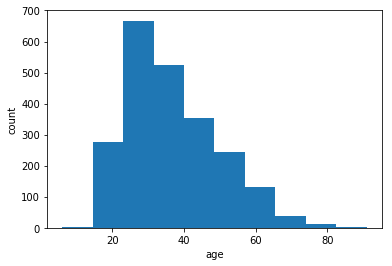

In [9]:
plt.hist(police_killings.age)
plt.xlabel('age')
plt.ylabel('count')
plt.show()

Age distribution is right skewed with a peak between 20 and 40.

let's try a different bin size

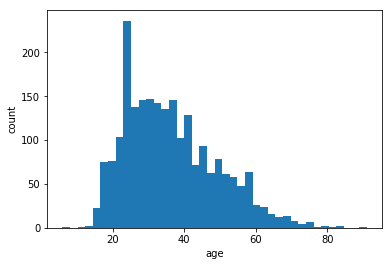

In [10]:
plt.hist(police_killings.age, bins=40)
plt.xlabel('age')
plt.ylabel('count')
plt.show()

interesting! there's certain age (~25) with the highest count, otherwise the plot is the same. Let's see the distribution of median_house_income.

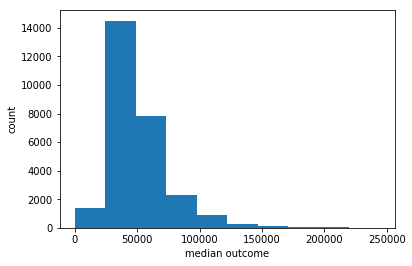

In [11]:
plt.hist(median_house_income.median_income)
plt.xlabel('median outcome')
plt.ylabel('count')
plt.show()

the plot is right skewed with a peak around 45k, given that cities with high median_income might not be noticed we will try a different transformation to dig deeper

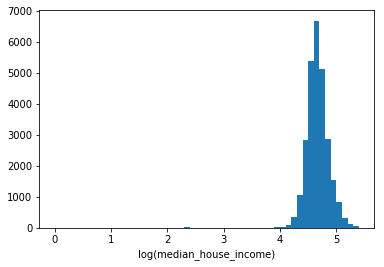

In [12]:
log_data = np.log10(median_house_income.median_income)
log_bin_edges = np.arange(0, log_data.max()+0.1, 0.1)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(median_house_income)')
plt.show()

let's zoom into the plot to start from 10^4 values while keeping in mind the lowest values

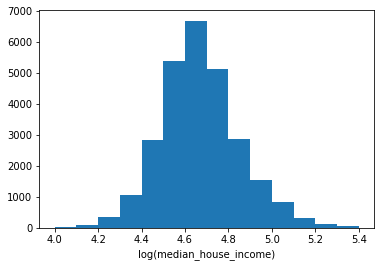

In [13]:
log_data = np.log10(median_house_income.median_income)
log_bin_edges = np.arange(4, log_data.max()+0.1, 0.1) #the plot is zoomed to start from 10**4
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(median_house_income)')
plt.show()

The log transformation of median_house_income follows a normal distribution with a peak between 40k and 60k and doesn't show any abnormalities.

Next we will plot number of deaths per month

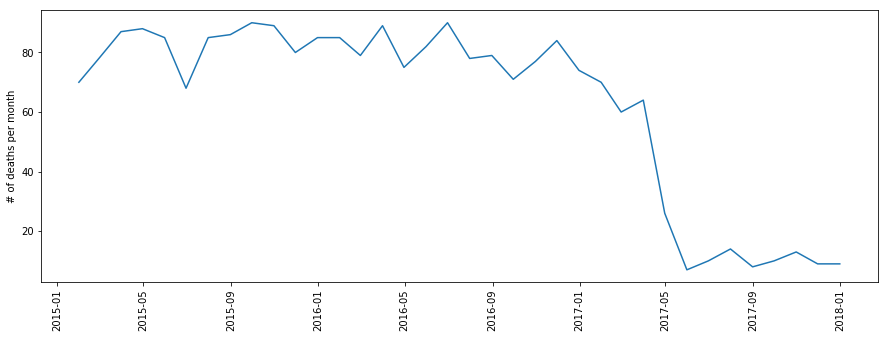

In [14]:
plt.figure(figsize=(15,5))

dates = police_killings.set_index('date').groupby(pd.Grouper(freq='M'))['id'].count()
sb.lineplot(data=dates)
plt.ylabel('# of deaths per month')
plt.xticks(rotation=90);

Plotting dates of police killings between Jan 2015 and Jan 2018 shows a number of deaths between 60 and 80 for each month until May 2017 where we notice a sudden fall in number of monthly deaths below 20 per month.

now, we'll look for different qualitative variables

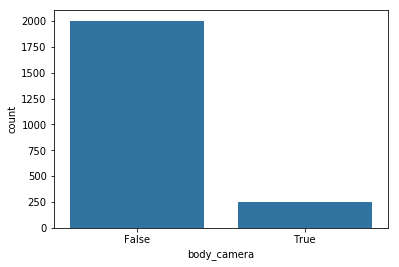

In [15]:
#body_cam
sb.countplot(data=police_killings, x='body_camera', color=uni_color);

In most killings there was no body camera.

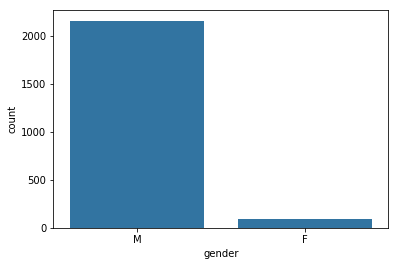

In [16]:
#gender
sb.countplot(data=police_killings, x='gender', color=uni_color);

Males have the highest count in this data with around 90/10 % ratio, let's see the values for different races.

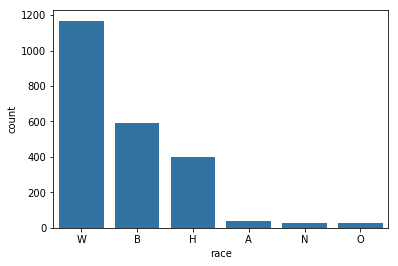

In [17]:
sb.countplot(data=police_killings, x='race', color=uni_color, order=police_killings.race.value_counts().index);

ordered from highest to lowest counts, people with white race are the most killed in this data, followed by black as the 2nd most killed, then comes hispanic race in third place and finally Asian, Native american and other with small counts. However, we should remake this plot with each race's proportion of the whole data to be fair.

In [18]:
(share_by_race.mean()/100).reset_index(name='proportions')

,index,proportions
0,share_white,0.832128
1,share_black,0.068346
2,share_native_american,0.028752
3,share_asian,0.015439
4,share_hispanic,0.093295


In [19]:
us_pop_2015 = 320000000.7
prop = share_by_race.mean()/100 * us_pop_2015
killings_per_race_count = police_killings.race.value_counts()[:-1] #There's no data for other races, that's why we exclude it from the count

killings_per_race_count.loc['W']/=prop.loc['share_white']
killings_per_race_count.loc['B']/=prop.loc['share_black']
killings_per_race_count.loc['N']/=prop.loc['share_native_american']
killings_per_race_count.loc['H']/=prop.loc['share_hispanic']
killings_per_race_count.loc['A']/=prop.loc['share_asian']

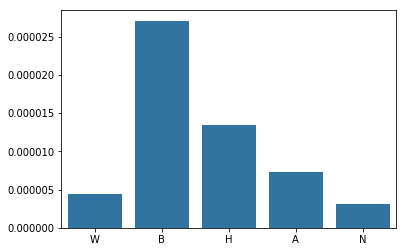

In [20]:
sb.barplot(x=killings_per_race_count.index, y=killings_per_race_count.values, color=uni_color);

The modification of the previous plot made by dividing the number of kills per race proportion shows that black people are the most killed during this period, next comes hispanic while white is the 2nd least in the list as opposed to what the previous plot has conveyed.

let's check manner of death variable.

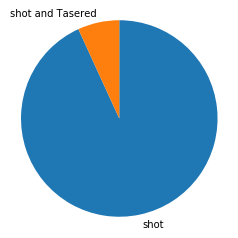

In [21]:
pie_plot(police_killings, 'manner_of_death')

Most of the manner_of_death counts are direct shots and a small percentage (around 10%) of shot and tasered.

let's explore the signs_of_mentall_illness variable

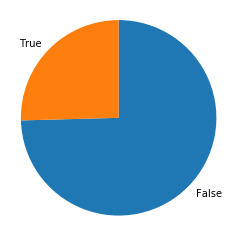

In [22]:
pie_plot(police_killings, 'signs_of_mental_illness')

Only around 25% of killings have shown signs of mental illness, let's check more variables like if the suspect were a fleeing or not and the threat level

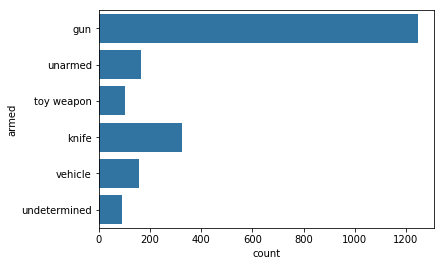

In [23]:
most_used = police_killings.armed.value_counts()>50
sb.countplot(data=police_killings.loc[police_killings.armed.isin(most_used[most_used].index.tolist())],
             y='armed', color=uni_color);

gun has the highest count as of 'armed' variable, however we can see that there were around 200 unarmed and toy weapon which raises the question of how where those 'armed' and led them to get killed? that's why we'll check another important variable: flee

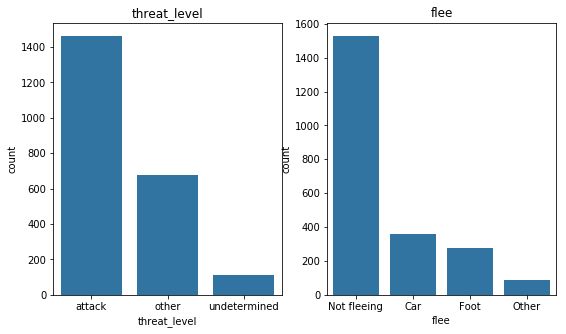

In [24]:
plt.figure(figsize=(9,5))

plt.subplot(121)
ax1 = sb.countplot(data=police_killings, x='threat_level', color=uni_color)
ax1.title.set_text('threat_level')

plt.subplot(122)
ax1 = sb.countplot(data=police_killings, x='flee', color=uni_color)
ax1.title.set_text('flee')

We can clearly see that most suspects were showing *attack* threat level and were'nt fleeing.

Next, we'll check the states where the killings took place and dig deeper beyond that by exploring data related to the state with most killings.

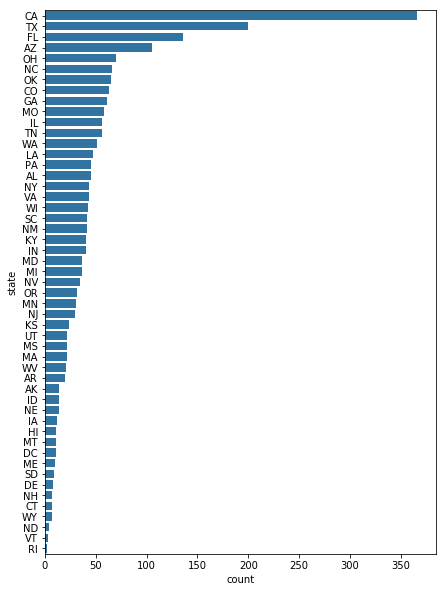

In [25]:
plt.figure(figsize=(7,10))
sb.countplot(data=police_killings, y='state', color=uni_color, order=police_killings.state.value_counts().index);

California is the state where most killings took place while Rhode Island is the one with least killings.

We will compare these two states' share by race, poverty level and high school grad level in the coming sections.

N.B: We will compare the mentioned states given that they have a huge difference in population (CA:39 million vs. RI: 1.1 million)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- The median_income_value distribution showed a right skewed plot which is why we log transformed the variable and it showed areas with very low median income compared to the rest of the most values which followed a normal distribution.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- The count of kills per race plot shows that white people are the most killed among the given data without taking race proportion into consideration, that's why we had to redo the plot by dividing the number of kills per race by the respective proportion and this shows as a result that black people are the most killed.

- The age variable showed a high peak around the age of 25 under a different bin size otherwise there was no need to perform any operation to tidy or change the form of the data.

- The number of killings per month had a sudden drop in May 2017

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

let's plot age against different qualitative variables

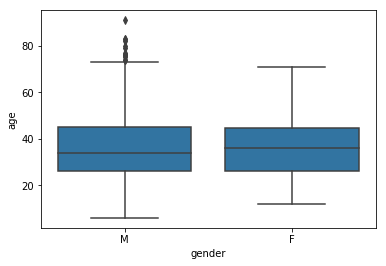

In [26]:
#age vs gender
sb.boxplot(data = police_killings, x = 'gender', y = 'age', color = uni_color);

the boxplot for male ages show more outliers and a lower mean than female.

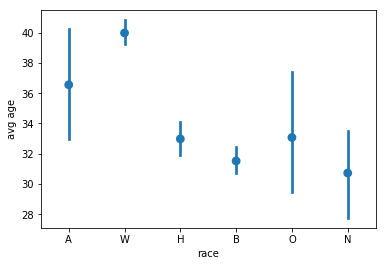

In [27]:
#age vs. race
sb.pointplot(data = police_killings, x = 'race', y = 'age', color = uni_color, linestyles='')
plt.ylabel('avg age');

this plot gives a shows clearly the avg age of different races and it depicts for example that white race avg age is around 40 whilst black is around 32.

let's plot age against signs of mentall illness

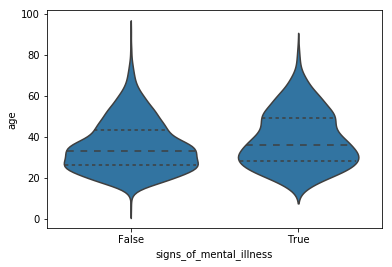

In [28]:
#age vs. signs_of_mental_illness
sb.violinplot(data = police_killings, x = 'signs_of_mental_illness', y = 'age', color = uni_color, inner='quartile');

signs of mental illness appear more frequently within 30s while the distribution of ages above 50 are more larger for people showing signs of mental illness.

Now let's compare the states we mentioned earlier: Carlifornia Vs. Rhode Island

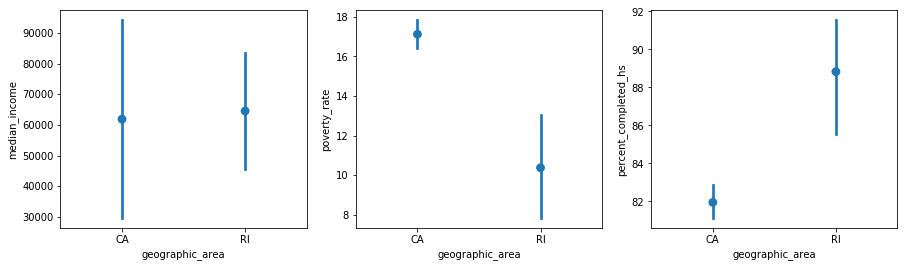

In [29]:
#median_house_income/percentage_below_poverty_level
plt.figure(figsize=(15,4))

state_income = median_house_income.loc[median_house_income.geographic_area.isin(['CA','RI'])]
state_poverty_lvl = percentage_below_poverty_level.loc[percentage_below_poverty_level.geographic_area.isin(['CA','RI'])]
state_comp = percent_over25_comp_highschool.loc[percent_over25_comp_highschool.geographic_area.isin(['CA','RI'])]

plt.subplot(131)
sb.pointplot(data=state_income,x='geographic_area', y='median_income',color = uni_color, linestyles='', ci='sd')

plt.subplot(132)
sb.pointplot(data=state_poverty_lvl,x='geographic_area', y='poverty_rate',color = uni_color, linestyles='')

plt.subplot(133)
sb.pointplot(data=state_comp,x='geographic_area', y='percent_completed_hs',color = uni_color, linestyles='');


In 2015, Rhode Island cities has on average higher median_house_income and with less standard deviation than cities of California.In addition, poverty rate in RI cities is much lower that CA cities. On average, percentage of people over the age of 25 that completed high school in RI (around 88%) cities is higher than CA (around 82%)

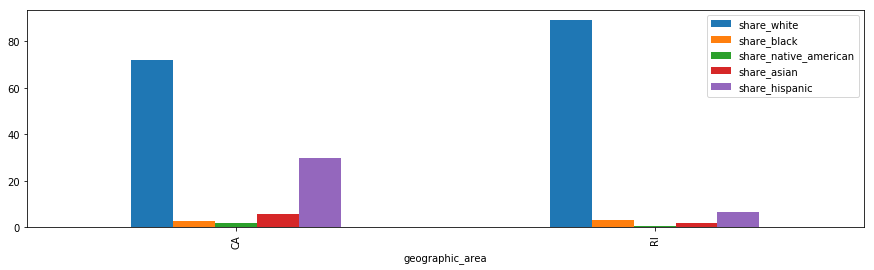

In [30]:
data = share_by_race.loc[share_by_race.geographic_area.isin(['CA','RI'])].groupby('geographic_area').mean()
data.plot(kind='bar',figsize=(15,4));

California has more variant race shares than Rhode Island

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Investigating the variables of interest depict that CA cities have on average lower median_house_income than RI cities, CA cities have on average more poverty rate than RI cities and CA cities have on average lower percentage of people over 25 that completed high school. These three variables are in favour of lower killings as expected.

>In addition, people showing signs of mental illness according to the data are older on average than people who do not 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Other features show no special relationships

## Multivariate Exploration

First we will the average age across different races and gender

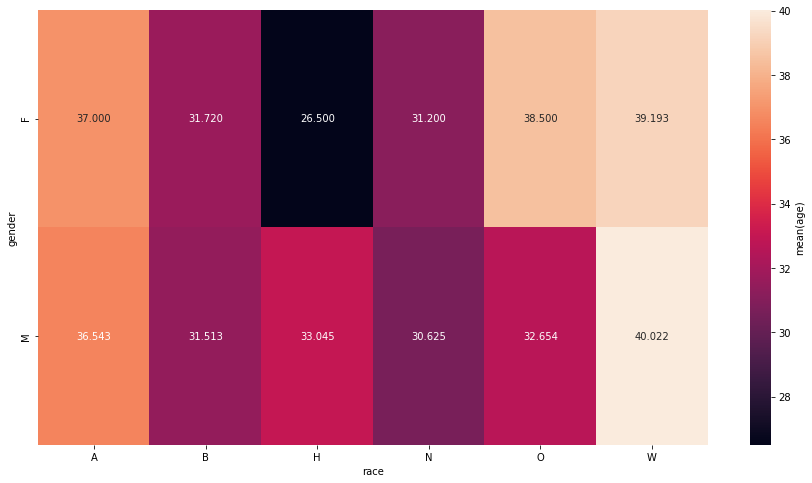

In [31]:
plt.figure(figsize=(15,8))

cat_means = police_killings.groupby(['gender', 'race']).mean()['age']
cat_means = cat_means.reset_index(name = 'age_avg')
cat_means = cat_means.pivot(index = 'gender', columns = 'race',
                            values = 'age_avg')
sb.heatmap(cat_means,annot=True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(age)'})
plt.title('');

This plot allow us to diffrence of avg age between gender and race variables where the lowest avg age is for hispanic females and highest is white males.

Next we will look into weapon (among the most used weapons only) usage per state

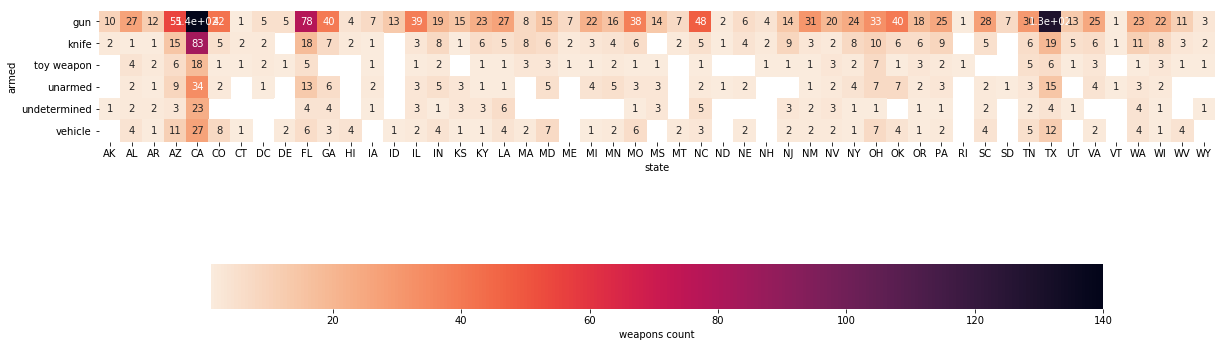

In [32]:
#https://stackoverflow.com/questions/45122416/one-horizontal-colorbar-for-seaborn-heatmaps-subplots-and-annot-issue-with-xtick
plt.figure(figsize=(20,15))

cat_means = police_killings.loc[police_killings.armed.isin(most_used[most_used].index.tolist())].groupby(['state', 'armed']).count()['id']
cat_means = cat_means.reset_index(name = 'count')
cat_means = cat_means.pivot(index = 'armed', columns = 'state',
                            values = 'count')
sb.heatmap(cat_means,cbar_kws={'orientation': 'horizontal', 'label' : 'weapons count', "shrink": .80},annot=True,cmap=sb.cm.rocket_r, square=True);

We already know that gun is the most used weapon but now we can spot which states used gun the most like California (CA), Texas(TX), and states with medium gun usage like Arizona(AZ),New York(NY),et... and other states with low weapon usage  like Rhode Island (RI), Vermont(VT),etc... . However, these observations are from this dataset only and we did not take each states population or number of existing guns etc...

Finally, we'll take a check the number of monthly deaths per state and race

In [33]:
police_killings['year-month'] = police_killings.date.apply(lambda x: x.strftime('%b-%Y')) 

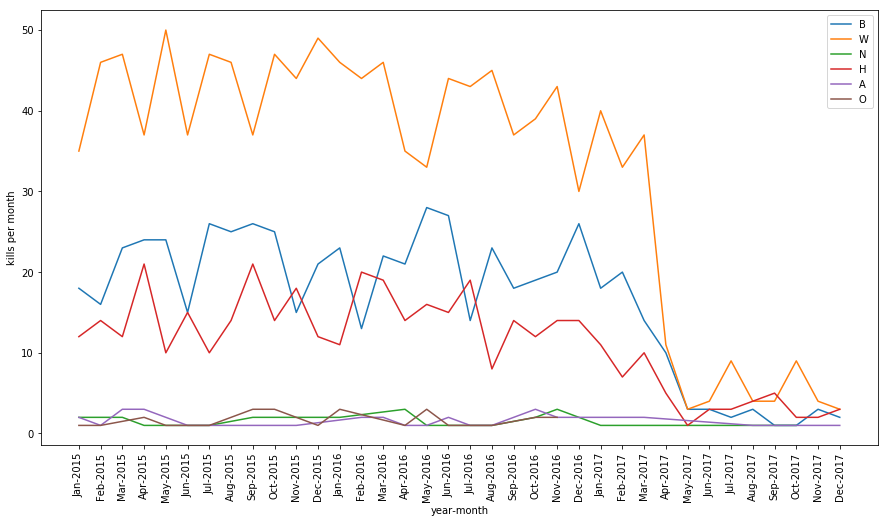

In [34]:
#https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column

plt.figure(figsize=(15,8))

dates1 = police_killings.groupby(['race','year-month'])['id'].agg('count').reset_index().rename(columns={'id':'count'}).sort_values(by='year-month')

custom_dict = {x:i for i,x in enumerate(police_killings.sort_values(by='date')['year-month'].unique())}

df = dates1[dates1['race'] == 'B']
sb.lineplot(data=df.iloc[df['year-month'].map(custom_dict).argsort()] , x='year-month', y='count', sort=False)

df = dates1[dates1['race'] == 'W']
sb.lineplot(data=df.iloc[df['year-month'].map(custom_dict).argsort()], x='year-month', y='count', sort=False)

df = dates1[dates1['race'] == 'N']
sb.lineplot(data=df.iloc[df['year-month'].map(custom_dict).argsort()], x='year-month', y='count', sort=False)

df = dates1[dates1['race'] == 'H']
sb.lineplot(data=df.iloc[df['year-month'].map(custom_dict).argsort()], x='year-month', y='count', sort=False)

df = dates1[dates1['race'] == 'A']
sb.lineplot(data=df.iloc[df['year-month'].map(custom_dict).argsort()], x='year-month', y='count', sort=False)

df = dates1[dates1['race'] == 'O']
sb.lineplot(data=df.iloc[df['year-month'].map(custom_dict).argsort()], x='year-month', y='count', sort=False)



plt.xticks(rotation=90)
plt.ylabel('kills per month')
plt.legend(['B','W','N','H','A','O']);

We can see that the time pattern of kills for white, black and hispanic is not similair but they share in common the same period of fluctuation which is 2 months.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- For most races there is no big difference for average age of the victims except for Hispanic females where avg age 26.5 and males 33, also this plot depicts a previously discussed observation where avg age of white people is more than black people.

- Showing the count of weapon usage in the second plot makes the picture about involved states more clear like depicting the states with the most gun usage, etc...

- The surprising pattern discussed earlier (The fall of monthly number of kills by May2017) applies for all races and it starts fluctuating again after May 2017. This pattern may be related to Trump's election (I searched events by that period and this was the one that made sense to me)

### Were there any interesting or surprising interactions between features?

- I don't think that there was any surprising interactions between features given that most of our features are qualitative.